In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [2]:
import urllib.request
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
baseurl = "https://shopnaclo.com/"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'}


In [4]:
url="https://shopnaclo.com/collections/all"

In [5]:
response = requests.get(url)
response.status_code

200

In [13]:
product_names=[]
k = requests.get(f'https://shopnaclo.com/collections/all')
soup = BeautifulSoup(k.content, "lxml")
for product in soup.findAll("p",class_="grid__title"):
    product_names.append(product.text)
    

In [20]:
productnames=[]
for i in product_names:
    x = re.sub("\n        ","",i)
    y = re.sub("\n      ","",x)
    productnames.append(x)

In [25]:
productlinks,product_links=[],[]
productlist = soup.find_all("div",class_="product-grid-item")

for item in productlist:
    #print(item)
    for link in item.find_all("a",href=True):
        product_links.append(baseurl + link['href'])
    productlinks = list(dict.fromkeys(product_links))
print(len(productlinks))

30


In [27]:
prices=[]
k = requests.get(f'https://shopnaclo.com/collections/all')
soup = BeautifulSoup(k.content, "lxml")
for price in soup.find_all("span",class_="price"):
    prices.append(price.text)

In [29]:
pricelist=[]
for i in prices:
    x = re.sub("\n          From \n          ","",i)
    y = re.sub("\n        ","",x)
    z = re.sub("    ","",y)
    pricelist.append(z)

In [31]:
images_links=[]
k = requests.get(f'https://shopnaclo.com/collections/all')

soup = BeautifulSoup(k.content, "lxml")
image_list = soup.find_all("img",class_="lazyload fade-in collection__image__top")
for element in image_list:
    images_links.append(element['data-src'])
images_links = list(dict.fromkeys(images_links))

In [32]:
for i in range(len(images_links)):
    images_links[i] =  re.sub("{width}","180",images_links[i])
images_links 

['//cdn.shopify.com/s/files/1/0554/3192/1821/products/welcometothefamily._180x.png?v=1630603915',
 '//cdn.shopify.com/s/files/1/0554/3192/1821/products/PurpleHoodiewithBackgroundcopy_180x.jpg?v=1633388603',
 '//cdn.shopify.com/s/files/1/0554/3192/1821/products/PurpleTshirtwithBackgroundcopy_180x.jpg?v=1633385695',
 '//cdn.shopify.com/s/files/1/0554/3192/1821/products/BleachPicturesfortheWebsiteREDSWEATPANTS1_180x.png?v=1626396896',
 '//cdn.shopify.com/s/files/1/0554/3192/1821/products/BleachPicturesfortheWebsiteREDSWEATSHIRT1_180x.png?v=1626397018',
 '//cdn.shopify.com/s/files/1/0554/3192/1821/products/RedSweatsuitSet_180x.jpg?v=1633397591',
 '//cdn.shopify.com/s/files/1/0554/3192/1821/products/RedTshirtcopy_180x.jpg?v=1626909432',
 '//cdn.shopify.com/s/files/1/0554/3192/1821/products/BleachPicturesfortheWebsiteSUNSHINESweatshirt_180x.png?v=1627412696',
 '//cdn.shopify.com/s/files/1/0554/3192/1821/products/BleachPicturesfortheWebsiteLAVAtshirt_180x.png?v=1627412982',
 '//cdn.shopify.co

In [ ]:
# creating the dataframe

In [33]:
df = pd.DataFrame({
    "Product Link": productlinks,
    "Image Link":images_links,
    "Price":pricelist,
    "Product Name":productnames})
df.to_csv("NacloApparel.csv",index=False)
df

,Product Link,Image Link,Price,Product Name
0,https://shopnaclo.com//collections/all/product...,//cdn.shopify.com/s/files/1/0554/3192/1821/pro...,$10.00,Gift Card\n
1,https://shopnaclo.com//collections/all/product...,//cdn.shopify.com/s/files/1/0554/3192/1821/pro...,$45.00,HAZE Sweatshirt\n
2,https://shopnaclo.com//collections/all/product...,//cdn.shopify.com/s/files/1/0554/3192/1821/pro...,$30.00,HAZE T-shirt\n
3,https://shopnaclo.com//collections/all/product...,//cdn.shopify.com/s/files/1/0554/3192/1821/pro...,$45.00,HEAT Sweatpants\n
4,https://shopnaclo.com//collections/all/product...,//cdn.shopify.com/s/files/1/0554/3192/1821/pro...,$45.00,HEAT Sweatshirt\n
5,https://shopnaclo.com//collections/all/product...,//cdn.shopify.com/s/files/1/0554/3192/1821/pro...,$90.00,HEAT Sweatsuit Set\n
6,https://shopnaclo.com//collections/all/product...,//cdn.shopify.com/s/files/1/0554/3192/1821/pro...,$30.00,HEAT T-shirt\n
7,https://shopnaclo.com//collections/all/product...,//cdn.shopify.com/s/files/1/0554/3192/1821/pro...,$45.00,LAVA Sweatshirt\n
8,https://shopnaclo.com//collections/all/product...,//cdn.shopify.com/s/files/1/0554/3192/1821/pro...,$30.00,LAVA T-shirt\n
9,https://shopnaclo.com//collections/all/product...,//cdn.shopify.com/s/files/1/0554/3192/1821/pro...,$45.00,MAPLE Sweatpants\n


In [ ]:
# scraping the product images

In [34]:
prodlinks = df['Image Link']
for i in range(len(prodlinks)):
    urllib.request.urlretrieve(("https:"+ prodlinks[i]), f"./{i}.jpg")

In [ ]:
# grayscaling and resizing the images

Original Dimensions :  (129, 180, 3)
Gray Dimensions :  (129, 180)
Gray & Resized Dimensions :  (28, 28)


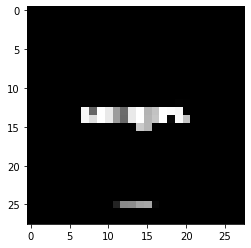

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


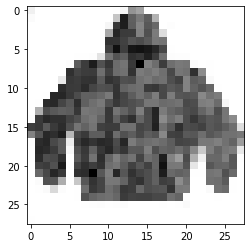

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


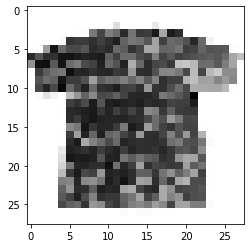

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


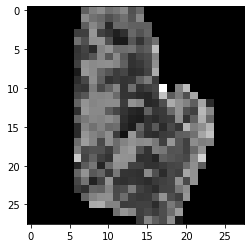

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


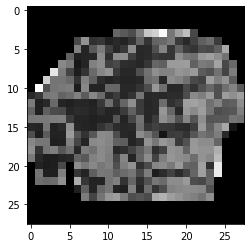

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


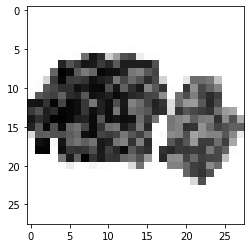

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


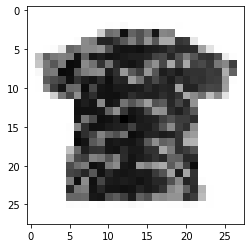

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


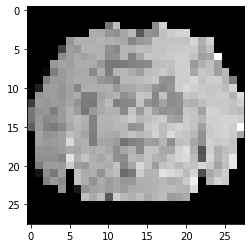

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


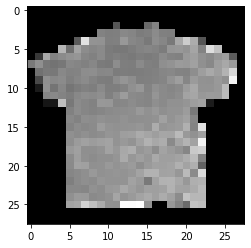

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


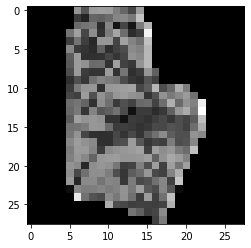

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


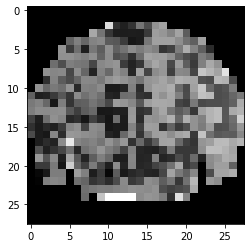

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


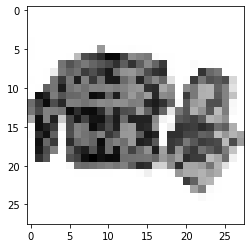

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


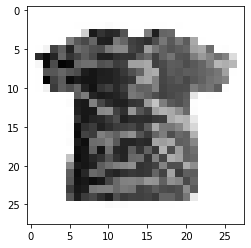

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


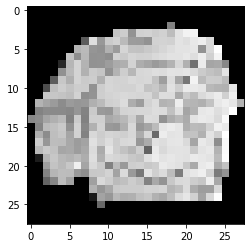

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


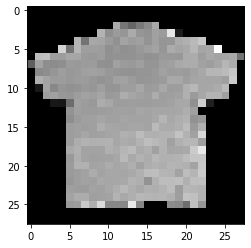

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


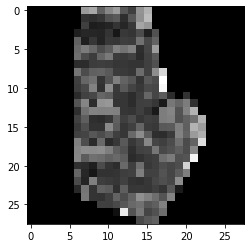

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


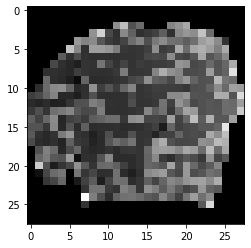

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


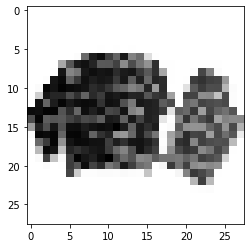

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


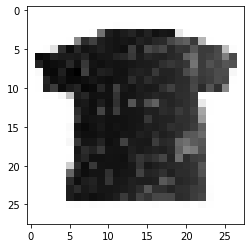

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


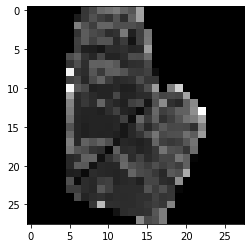

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


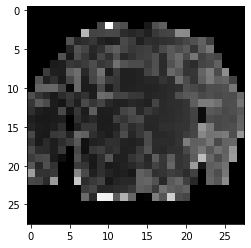

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


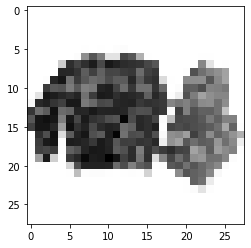

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


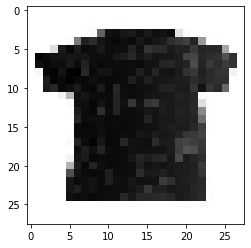

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


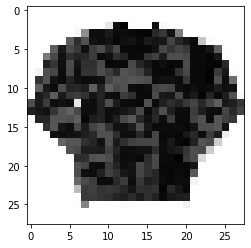

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


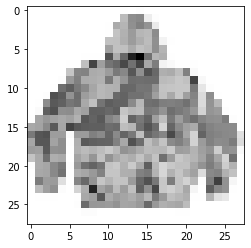

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


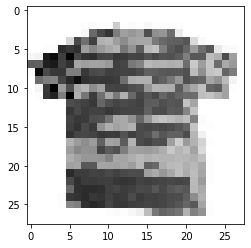

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


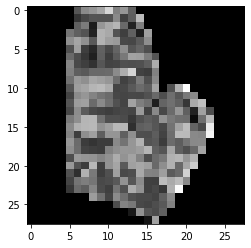

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


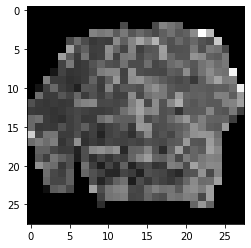

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


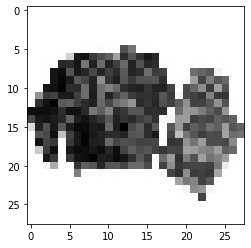

Original Dimensions :  (180, 180, 3)
Gray Dimensions :  (180, 180)
Gray & Resized Dimensions :  (28, 28)


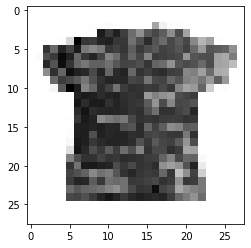

In [3]:
import cv2


for i in range(30):
    img = cv2.imread(f'{i}.jpg')
    print('Original Dimensions : ',img.shape)
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    print('Gray Dimensions : ',gray.shape)
    
    gray_resized = cv2.resize(gray, (28, 28))
    print('Gray & Resized Dimensions : ',gray_resized.shape)
    
    from matplotlib import pyplot as plt
    plt.imshow(gray_resized, cmap=plt.cm.gray)
    plt.show()
    
    cv2.imwrite(f'{i+100}_grayresized.jpg', gray_resized)
